## Data
- **The SMS (text) data was downloaded from UCI datasets.**
- **It contains 5,574 SMS phone messages.**
- **The data were collected for the purpose of mobile phone spam research and have already been labeled as either spam or ham**

# Steps
-  **Import all the necessary Libraries for analysis, Visualization, Algorithms**
-   **Explore Data Analysis**
-   **Using NLP stopwords, tokenization**
-   **split the dataset**
-   **Build the model** 
-   **Use statical model analysis perfrom classification report(Confusion matrix , cohhen_kappa_score, AUC, ROC,accuracy)**

### Data Analysis

> **PANDAS :**
> - **Reference link for Pandas :** https://pandas.pydata.org/docs/reference/index.html 
    - Pandas provide high performance, fast, easy to use data structures and data analysis tools for manipulating numeric data and time series. Pandas is built on the numpy library and written in languages like Python, Cython, and C. In pandas, we can import data from various file formats like JSON, SQL, Microsoft Excel, etc.
>    
**NUMPY:**
> - **Reference link for Numpy :**  https://numpy.org/doc/stable/reference/
       - It is the fundamental library of python, used to perform scientific computing. It provides high-performance multidimensional arrays and tools to deal with them. A numpy array is a grid of values (of the same type) that are indexed by a tuple of positive integers, numpy arrays are fast, easy to understand, and give users the right to perform calculations across arrays.
       
       
 ### Data Visualizations
 - Data Visualization is the graphic representation of data. It converts a huge dataset into small graphs, thus aids in data analysis and predictions
       
**MATPLOTLIB**
>-**Reference link for Matplotlib :** https://scipy-lectures.org/intro/matplotlib/index.html
- It is a Python library used for plotting graphs with the help of other libraries like Numpy and Pandas. It is a powerful tool for visualizing data in Python. It is used for creating statical interferences and plotting 2D graphs of arrays

**SEABORN:**
> - **Reference link for Seaborn :** https://seaborn.pydata.org/api.html
- It is also a Python library used for plotting graphs with the help of Matplotlib, Pandas, and Numpy. It is built on the roof of Matplotlib and is considered as a superset of the Matplotlib library. It helps in visualizing univariate and bivariate data

**NLTK:**
> - **Reference link fro NLTK is :** https://www.nltk.org/book/ch03.html
> - pip install nltk to download the kit
- It contains libraries and programs for statistical language processing.
- It is one of the most powerful NLP libraries, which contains packages to make machines understand human language and reply to it with an appropriate response.

#### Import the modules needed.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [38]:
# Import Pandas and NumPy


# importing numpy be used as an efficient multi-dimensional container of generic data.
import numpy as np  

#importing pandas it allows you to perform data manipulation create, manipulate and wrangle the data in python.
import pandas as pd


#   ---------- # Visualizations---------

# Import Libraries for plotting 

#Matplotlib is a Python 2D plotting library
import matplotlib.pyplot as plt
%matplotlib inline

# Seaborn is high-level interface for drawing attractive and informative statistical graphics.
import seaborn as sns


# importing NLTK (Natrual Language Tool Kit)
import nltk
#importing stopwords
from nltk.corpus import stopwords

#import string
import string


# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

import re


In [39]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [40]:
from nltk.corpus import stopwords
for i in stopwords.words('english'): print(i, end = " ")

i me my myself we our ours ourselves you you're you've you'll you'd your yours yourself yourselves he him his himself she she's her hers herself it it's its itself they them their theirs themselves what which who whom this that that'll these those am is are was were be been being have has had having do does did doing a an the and but if or because as until while of at by for with about against between into through during before after above below to from up down in out on off over under again further then once here there when where why how all any both each few more most other some such no nor not only own same so than too very s t can will just don don't should should've now d ll m o re ve y ain aren aren't couldn couldn't didn didn't doesn doesn't hadn hadn't hasn hasn't haven haven't isn isn't ma mightn mightn't mustn mustn't needn needn't shan shan't shouldn shouldn't wasn wasn't weren weren't won won't wouldn wouldn't 

In [41]:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [6]:
# Read the data of credit card fraud detection
# Here file is CSV i.e Comma Seperated Values
#df is a variable

df = pd.read_csv("/content/drive/MyDrive/DevTown/Projects/Email Spam or Ham using svm/spam.csv")

### EDA  (Exploratory Data Analysis) :
- **head()**Understand your data using the head() function to look at the first few rows.
- **shape()**Review the dimensions of your data with the shape property.
- **info()**To know the information aboutvthe data
- **Dtyes** Look at the data types for each attribute with the dtypes property.
- **describe**Review the distribution of your data with the describe() function.
- **Correlation** Calculate pairwise correlation between your variables using the corr() function.

In [7]:
df.head()
#Understand your data using the head() function to look at the first few rows.

# Checking the first 5 rows

,Label,EmailText
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.Label.value_counts()

ham     4825
spam     747
Name: Label, dtype: int64

#### shape 
- Know the shape of the dataset , how many rows and columns .
- shape[0] is rows 
- shape[1] is columns 

In [9]:

print("There are {} rows and {} columns are present in the Data Set".format(df.shape[0],df.shape[1]))

#printing the rows and columns 

There are 5572 rows and 2 columns are present in the Data Set


#### Note
- By understanding the info() , we can say that all the columns are object type.
- there is no null values are present, we can check the memory usage i.e 87.2+ KB

#### The describe() 
- Describe method from pandas provide a summary statistics

In [10]:
df.describe()

,Label,EmailText
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


**Note**
- Let’s get the summary statistics and visualize the data. 
- The describe() method from pandas provide a summary statistics. Such as, there are 5,572 labels and messages. 
- There are two unique labels indicating for “ham” and “spam”.
- We can also observe that there are less unique messages (5,169) than total message count(5,572) indicating some repeated messages.
- The top label is “ham” and the top message in the data is “Sorry, I’ll call later”. 
- The duplicatedRow below shows, there are 403 duplicated messages.

In [11]:
df.groupby('Label').describe().T
# Describe the Label column for better understanding

Label                                ham  \
EmailText count                     4825   
          unique                    4516   
          top     Sorry, I'll call later   
          freq                        30   

Label                                                          spam  
EmailText count                                                 747  
          unique                                                653  
          top     Please call our customer service representativ...  
          freq                                                    4

### isnull()
- To know the how many null values are present in the dataset

In [12]:
df.isnull().sum()


Label        0
EmailText    0
dtype: int64

**Note**
- There no null values are present in this spam detection dataset.

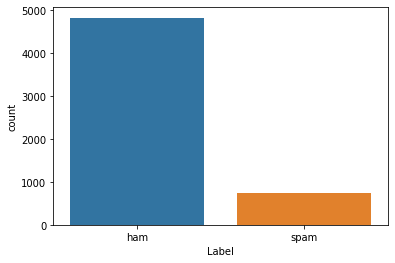

In [13]:
sns.countplot(df["Label"])

**This indicates the imbalanced data had found**

#### Duplicate() : 
> Reference link for duplicate() method is : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html
     

In [42]:
duplicatedRow = df[df.duplicated()]
print(duplicatedRow[:])

Empty DataFrame
Columns: [Label, EmailText]
Index: []


**NOTE**
- To know the duplicates on the data, There are 403 rows of duplicates 

#### Remove the duplicates

In [16]:
#drop the duplicates by using duplicate maethod
df.drop_duplicates(inplace = True)

In [17]:
#show the new shape having number of rows and columns after duplication is dropped

print("There are {} rows and {} columns are present in the Data Set".format(df.shape[0],df.shape[1]))

#printing the rows and columns 

There are 5169 rows and 2 columns are present in the Data Set


**Note**
> - **There are 403 duplicate records are present in the dataset so we are removed , now there is 5169 rows of data**

### Pre-processing


In [43]:
import string 
punctuation_marks = string.punctuation
punctuation_marks

from nltk.corpus import stopwords
stopword_list = stopwords.words('english')
# stopword_list

from nltk import word_tokenize
nltk.download('punkt')

nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer

from nltk.stem import PorterStemmer
pstem =PorterStemmer()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [19]:
lemm = WordNetLemmatizer()
lemm.lemmatize("better", pos = 'a')

'good'

In [20]:
# Step 1: remove al punctuation marks
def remove_punctuation_marks(x):

    for i in punctuation_marks:
        x = x.replace(i, "")
    return x

# Step 2: convert to lower case
def convert_lowercase(x):
    return x.lower()



# Step 3: Tokeniztion
def tokenization(x):
    return word_tokenize(x)

#step 4: remove stop words
def remove_stop_words(x):
    res = []
    for wrd in x:
        if wrd not in stopword_list:
            res.append(wrd)
    return res

# step 5: stemming/lemmatization
def stemming_words(x):
    res = []
    for wrd in x:
        res.append(pstem.stem(wrd))
    return res

In [44]:
def pre_process_text(x):

    x = remove_punctuation_marks(x)
    x = convert_lowercase(x)
    x = tokenization(x)
    x = remove_stop_words(x)
    x = stemming_words(x)
    
    return x


In [45]:
df["EmailText"]

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568               Will Ã_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: EmailText, Length: 5169, dtype: object

In [46]:
df["EmailText"].apply(pre_process_text)

0       [go, jurong, point, crazi, avail, bugi, n, gre...
1                            [ok, lar, joke, wif, u, oni]
2       [free, entri, 2, wkli, comp, win, fa, cup, fin...
3           [u, dun, say, earli, hor, u, c, alreadi, say]
4       [nah, dont, think, goe, usf, live, around, tho...
                              ...                        
5567    [2nd, time, tri, 2, contact, u, u, ã¥â£750, po...
5568                      [ã, b, go, esplanad, fr, home]
5569                         [piti, mood, soani, suggest]
5570    [guy, bitch, act, like, id, interest, buy, som...
5571                                   [rofl, true, name]
Name: EmailText, Length: 5169, dtype: object

### CountVectorizer
>- Reference link for CountVectorizer : https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
- It Convert a collection of text documents into a matrix of token counts

In [47]:
l = ["I am a boy",
     "Where are you going",
     "Two plus two equals four",
     "two multiplied two equals four"]

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
#import a CountVectorizer

In [57]:

vectorizer = CountVectorizer(analyzer = pre_process_text)
vectorizer.fit(df["EmailText"]) #l
xarr_countvec = vectorizer.transform(df["EmailText"]) #l

In [58]:
xarr_countvec.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [60]:
# dcol = [[vectorizer.vocabulary_[wrd], wrd] for wrd in vectorizer.vocabulary_]
# cols = [i[1] for i in sorted(dcol)]
# countvec_df = pd.DataFrame(xarr_countvec.toarray(), columns = cols)
# countvec_df


#### Tf-IDF

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfvec = TfidfVectorizer(analyzer = pre_process_text)
tfidfvec.fit(df["EmailText"])
xarr_tfidf = tfidfvec.transform(df["EmailText"])

### Split the dataset into training and testing

#### Train_Test_Split
> - Reference link : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
> - **Train-Test Split Evaluation**
- The train-test split is a technique for evaluating the performance of a machine learning algorithm.

- It can be used for classification or regression problems and can be used for any supervised learning algorithm.

- The procedure involves taking a dataset and dividing it into two subsets. The first subset is used to fit the model and is referred to as the training dataset. The second subset is not used to train the model; instead, the input element of the dataset is provided to the model, then predictions are made and compared to the expected values. This second dataset is referred to as the test dataset.

- Train Dataset: Used to fit the machine learning model.
- Test Dataset: Used to evaluate the fit machine learning model.
- The objective is to estimate the performance of the machine learning model on new data: data not used to train the model.

>  common split percentages include:

- Train: 80%, Test: 20%
- Train: 67%, Test: 33%
- Train: 50%, Test: 50%

In [25]:
xarr_tfidf.shape

(5169, 8093)

In [62]:
output = df["Label"].map({"spam":0, "ham":1})
input = xarr_tfidf #xarr_countvec

In [63]:

#importing train_test_split
from sklearn.model_selection import train_test_split

## split into train tests sets
input_train, input_test, output_train, output_test=train_test_split(input,output,test_size=0.2)

### Build the model

###  Support Vector Machine

> - Reference link for SVM is : https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
- Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning.

- The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.

- SVM chooses the extreme points/vectors that help in creating the hyperplane. These extreme cases are called as support vectors, and hence algorithm is termed as Support Vector Machine. 



![support-vector-machine-algorithm.png](attachment:support-vector-machine-algorithm.png)

In [129]:
input_train

<4135x8093 sparse matrix of type '<class 'numpy.float64'>'
	with 36071 stored elements in Compressed Sparse Row format>

In [137]:
from sklearn.svm import SVC
svc = SVC(C=2, kernel = "sigmoid", gamma = 'scale')

svc.fit(input_train, output_train)

SVC(C=2, kernel='sigmoid')

In [136]:
svc.gamma

'scale'

In [134]:
pred_test = svc.predict(input_test)

In [135]:
from sklearn.metrics import classification_report
print(classification_report(pred_test, output_test))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       112
           1       0.99      0.98      0.99       922

    accuracy                           0.97      1034
   macro avg       0.92      0.96      0.94      1034
weighted avg       0.98      0.97      0.98      1034



### GridSearchCV - Hyper Parameter Tuning
>- Reference link for GridSearhCV is : https://scikit-learn.org/stable/modules/grid_search.html
- A Machine Learning model is defined as a mathematical model with a number of parameters that need to be learned from the data. 
- However, there are some parameters, known as Hyperparameters and those cannot be directly learned. They are commonly chosen by human based on some intuition or hit and trial before the actual training begins.
- These parameters exhibits their importance by improving performance of the model such as its complexity or its learning rate.
- Models can have many hyper-parameters and finding the best combination of parameters can be treated as a search problem.

> - Parameters are :
- Kernel   ----> choose the best Kernel 
- gamma    ----> how far the influence of a single training
- C        ----> C parameter trades off correct classification of training
        

In [29]:
#import GridSearchCV to know the best parameters
from sklearn.model_selection import GridSearchCV

In [143]:
from sklearn.metrics import f1_score
tuned_parameters = {'kernel': ['rbf', 'sigmoid'], 'gamma': ['scale', 'auto'],
                     'C': [1, 1.5, 2, 5, 10, 100]}

model = GridSearchCV(estimator=SVC(), param_grid=tuned_parameters, scoring = "f1", cv = 5)

model.fit(input_train, output_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 1.5, 2, 5, 10, 100],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'sigmoid']},
             scoring='f1')

In [144]:
model.cv_results_

{'mean_fit_time': array([1.21062064, 0.41025138, 0.37845984, 0.36941962, 1.14575872,
        0.31402745, 0.48965573, 0.49961076, 1.1004096 , 0.46446037,
        0.66668072, 0.31694198, 1.09838963, 0.28834939, 0.42022591,
        0.35816665, 1.10488777, 0.26594834, 0.45997324, 0.38232584,
        1.09881105, 0.20675945, 0.49709349, 0.47501283]),
 'std_fit_time': array([0.1622293 , 0.07481162, 0.03526997, 0.00992773, 0.15423254,
        0.0058269 , 0.1013119 , 0.1240014 , 0.01762235, 0.07420881,
        0.31914124, 0.00212472, 0.01131411, 0.01370957, 0.00582587,
        0.0045581 , 0.00961642, 0.00902945, 0.00685821, 0.00643718,
        0.0116655 , 0.01652758, 0.01718861, 0.04745161]),
 'mean_score_time': array([0.22904773, 0.07152305, 0.09814062, 0.08250194, 0.20679312,
        0.06184282, 0.11029196, 0.10434093, 0.22666616, 0.08056383,
        0.18498254, 0.07298899, 0.19729452, 0.05299129, 0.10036335,
        0.07454009, 0.19794073, 0.0491178 , 0.10528698, 0.07909307,
        0.196662

In [122]:
model.best_params_

{'C': 2, 'kernel': 'sigmoid'}

### NOTE : Best Parameters are :
> - **'C':       100**
> - **'gamma':   0.001**
> - **'kernel':  'rbf'**

In [123]:
best_model = SVC(C = 2, kernel = "sigmoid")
best_model.fit(input_train, output_train)


SVC(C=2, kernel='sigmoid')

In [124]:
pred_test = best_model.predict(input_test)

In [125]:
from sklearn.metrics import classification_report
print(classification_report(pred_test, output_test))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       112
           1       0.99      0.98      0.99       922

    accuracy                           0.97      1034
   macro avg       0.92      0.96      0.94      1034
weighted avg       0.98      0.97      0.98      1034



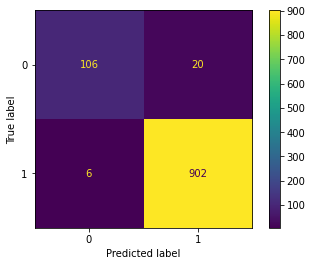

In [146]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(best_model, input_test, output_test)

### Classification Matrix 
>  **Confusion matrix**

> - **Reference link for Confusion Matrix** - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
- A confusion matrix is a table that is often used to describe the performance of a classification model 
- true positives (TP): These are cases in which we predicted yes (they have the disease), and they do have the disease.
- true negatives (TN): We predicted no, and they don't have the disease.
- false positives (FP): We predicted yes, but they don't actually have the disease. (Also known as a "Type I error.")
- false negatives (FN): We predicted no, but they actually do have the disease. (Also known as a "Type II error.")


> 

> - precision - What proportion of positive identifications was actually correct?
> - recall - What proportion of actual positives was identified correctly?
>

> **F1 Score**
- F1 Score is the weighted average of Precision and Recall
-  F1 is usually more useful than accuracy, especially if you have an uneven class distribution.


### Note : 

> Kappa Score : 
-  It can also be used to assess the performance of a classification model.
-  we know that Cohen’s kappa is a useful evaluation metric when dealing with imbalanced data
- Cohen's kappa coefficient (κ) is a statistic that is used to measure inter-rater reliability
- Cohen’s kappa tries to correct the evaluation bias by taking into account the correct classification by a random guess

![Interpretation-of-Kappa-Statistic-21.png](attachment:Interpretation-of-Kappa-Statistic-21.png)
   


> AUC 
- Its provies an aggregative measure of performance occurs all posibile classification thresholds
- it talks about linearty about the dataset
- AUC starts from 0 to 1
- The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.
>

> ROC (Receiver Operating Characterstic curve):
- It shows the performance of the model through all thresholds
- curve plot between two parameters
> Tpr (Sensivity)
>Fpr  (specifity)


In [ ]:
#import the libraries for stats metrices
import numpy as np

#importing the Confusion matrix metrics and classification reports
from sklearn.metrics import confusion_matrix, classification_report

#Importing cohen_kappa_score and roc_auc_score metrices
from sklearn.metrics import cohen_kappa_score, roc_auc_score
from sklearn.metrics import roc_curve, auc

#importing visualizing library
import matplotlib.pyplot as plt
import seaborn as sns

#logloss to check is there loss or difference
from sklearn.metrics import log_loss

#Creating a Function name called Classification Metric
def classification_metric(y_test,y_pred,y_prob,label,n=1,verbose=False):
    """
    Note: only for binary classification
    confusionmatrix(y_true,y_pred,labels=['Ham','Spam'])
    """
    # confusion matrix
    
    cm = confusion_matrix(y_test,y_pred)
    row_sum = cm.sum(axis=0)
    cm = np.append(cm,row_sum.reshape(1,-1),axis=0)
    col_sum = cm.sum(axis=1)
    cm = np.append(cm,col_sum.reshape(-1,1),axis=1)

    labels = label+['Total']
    
    plt.figure(figsize=(10,6))
    #plotting a fig size as 10 width and 6 height
    
    
    sns.heatmap(cm,annot=True,cmap='summer',fmt='0.2f',xticklabels=labels,
                yticklabels=labels,linewidths=3,cbar=None,)
    #create a heapmap using seaborn libarary and used various parametere

    plt.xlabel('Predicted Values')
    #ploting the values on x- axis as Predicted values
    
    plt.ylabel('Actual Values')
    #ploting the values on y- axis as actual values
    
    plt.title('Confusion Matrix')
    # Mentioning the title of the figure
    
    plt.show()
    #show the image
    
    print('*'*30+'Classifcation Report'+'*'*30+'\n\n')
    #showing * are to put a  line to style
    
    #created classification report
    cr = classification_report(y_test,y_pred)
    
    #print the classifiaction report
    print(cr)
    
    print('\n'+'*'*36+'Kappa Score'+'*'*36+'\n\n')
    
    
    # Kappa score
    kappa = cohen_kappa_score(y_test,y_pred) # Kappa Score
    print('Kappa Score =',kappa)
    
    print('\n'+'*'*30+'Area Under Curve Score'+'*'*30+'\n\n')
    # Kappa score
    roc_a = roc_auc_score(y_test,y_pred) # Kappa Score
    print('AUC Score =',roc_a)
    
    # ROC
    
    
    plt.figure(figsize=(8,5))
    #plot the figuare based on width and height sizes
    
    fpr,tpr, thresh = roc_curve(y_test,y_prob)
    #fpr false positive rate
    #tpr true positive rate
    
    plt.plot(fpr,tpr,'r')
    print('Number of probabilities to build ROC =',len(fpr))
    if verbose == True:
        for i in range(len(thresh)):
            if i%n == 0:
                plt.text(fpr[i],tpr[i],'%0.2f'%thresh[i])
                plt.plot(fpr[i],tpr[i],'v')


    plt.xlabel('False Positive Rate')
    #fpr on x -axis 
    
    plt.ylabel('True Positive Rate')
    #tpr on y axis
    
    plt.title('Receiver Operating Characterstic')
    #mentioning the title of the figuare
    
    plt.legend(['AUC = {}'.format(roc_a)])
    #assign the legend to the figuare
    
    plt.plot([0,1],[0,1],'b--',linewidth=2.0)
    #mentioning then line width as 2.0
    
    plt.grid()
    # show the grid lines to the image
    
    plt.show()
    #display the image
    
  # A point beyond which there is a change in the manner a program executes  
class threshold():
    '''
    Setting up the threshold points
    '''
    def __init__(self):
        self.th = 0.5
        
    def predict_threshold(self,y):
        if y >= self.th:
            return 1
        else:
            return 0

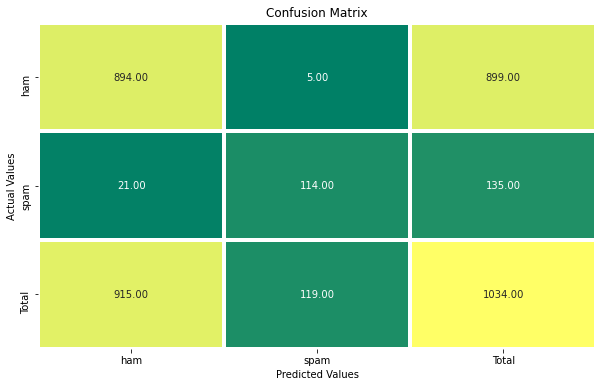

******************************Classifcation Report******************************


              precision    recall  f1-score   support

           0       0.98      0.99      0.99       899
           1       0.96      0.84      0.90       135

    accuracy                           0.97      1034
   macro avg       0.97      0.92      0.94      1034
weighted avg       0.97      0.97      0.97      1034


************************************Kappa Score************************************


Kappa Score = 0.8833696302916193

******************************Area Under Curve Score******************************


AUC Score = 0.9194413545915215
Number of probabilities to build ROC = 54


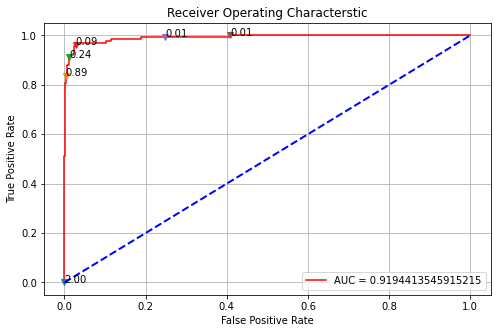

In [ ]:
#Calling the Classification_metric function. It will displays all the metrices which are we created earlier

classification_metric(y_test,y_pred,y_pred_proba,['ham','spam'],n=10,verbose=True)

# VERBOSE : This flag allows you to write regular expressions that look nicer and are more readable by allowing you to visually separate logical sections of the pattern and add comments.

## Note :- 
> - **Accuracy** - 0.97
> - **Kappa Score** - 0.88
> - **AUC SCORE** -   0.91
